In [1]:
#imported the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Raw_data_Q1.csv') # loading from the raw data file

In [3]:
df

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y
5,68.7,123,50,26,N
6,69.8,141,51,22,Y
7,70.1,136,23,20,Y
8,67.9,112,17,19,N
9,66.8,120,39,31,N


In [6]:
df['Frailty'] = df['Frailty'].replace(['Y', 'N'], [1, 0]) # I have replaced the Y and N with 1 and 0 and converted frailty to integer

df['Frailty'] = df['Frailty'].astype(int)

print(df)

   Height  Weight  Age  Grip strength  Frailty
0    65.8     112   30             30        0
1    71.5     136   19             31        0
2    69.4     153   45             29        0
3    68.2     142   22             28        1
4    67.8     144   29             24        1
5    68.7     123   50             26        0
6    69.8     141   51             22        1
7    70.1     136   23             20        1
8    67.9     112   17             19        0
9    66.8     120   39             31        0


In [7]:
df.to_csv('clean_data.csv', index=False)

In [11]:
# Loaded the cleaned data from 'clean_data.csv'
df = pd.read_csv('clean_data.csv')

print(df.columns)

Index(['Height', 'Weight', 'Age', 'Grip strength', 'Frailty'], dtype='object')


In [12]:
# Removing the extra spaces from all column names
df.columns = df.columns.str.strip()

In [16]:
frail_grip_strength = df[df['Frailty'] == 1]['Grip strength']
non_frail_grip_strength = df[df['Frailty'] == 0]['Grip strength']

# Perform T-test with unequal variance (Welch's T-test)
grip_strength_ttest = ttest_ind(frail_grip_strength, non_frail_grip_strength, equal_var=False)

# Displaying T-Test results
print("T-Test results for Grip Strength between Frail and Non-Frail Participants:")
print("T-Statistic:", grip_strength_ttest.statistic)
print("P-Value:", grip_strength_ttest.pvalue)

T-Test results for Grip Strength between Frail and Non-Frail Participants:
T-Statistic: -1.6349999934600006
P-Value: 0.1415730416628566


##A plot showing relation between height and weight

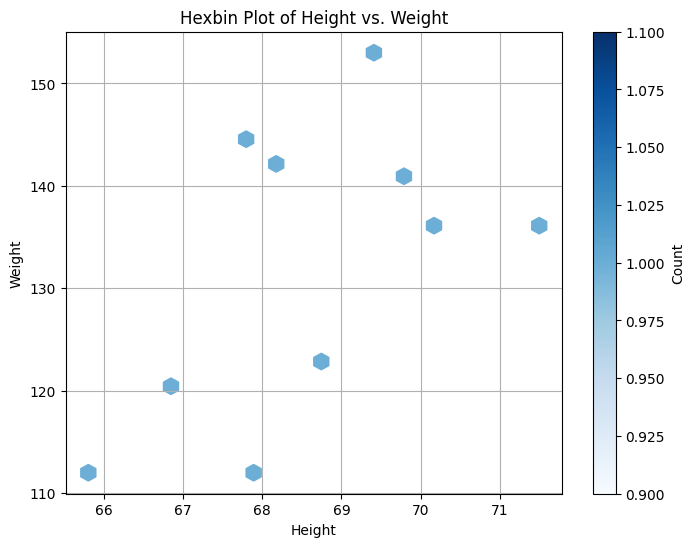

In [15]:
plt.figure(figsize=(8, 6))
plt.hexbin(df['Height'], df['Weight'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Hexbin Plot of Height vs. Weight')
plt.grid(True)
plt.show()